In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import shap

https://forecastegy.com/posts/xgboost-binary-classification-python/

Load in the csv of the data you plan to model

In [2]:
# Load the data
folder_directory = 'E:/!!Research/!!!Data/ArcGIS_Projects/mesq_prediction/test_mesq_prediction_points'
data_with_coords = pd.read_csv(f'{folder_directory}/acc_points_env_data/acc_points_env_data_no_ls.csv')
data = data_with_coords.drop(columns = ['latitude', 'longitude', 'system:index'])
# Display the first few rows of the data
data.head()

clay_0_5  clay_5_15  clay_15_30  clay_30_60  clay_60_100  clay_100_200  \
0   7.394737   8.660942   12.190731   18.825853    23.299412     22.041016   
1   8.303518   9.760489   13.190058   18.418049    20.543903     19.303711   
2   7.991723  10.349167   14.908423   21.072407    22.445259     18.247808   
3   7.966407  10.285504   14.818983   21.191105    23.068914     19.030792   
4  10.300976  13.208171   17.912170   22.774147    21.497070     16.478537   

    sand_0_5  sand_5_15  sand_15_30  sand_30_60  ...  wind_erodibility  \
0  76.708054  76.314087   73.214287   63.689034  ...        199.821030   
1  76.692383  76.437500   73.603615   66.573318  ...        146.624695   
2  73.754402  71.855186   68.623169   59.180626  ...        202.976257   
3  73.780121  71.885895   68.552788   59.021484  ...        170.503799   
4  70.315140  67.883713   64.214569   57.583008  ...        147.005341   

     rf_025  water_storage    ann_rain  temp_range    elevation     slope  \
0  0.011238      15.397797  373.533234  384.986969  1308.601318  1.050376   
1  0.022979      16.940416  374.002777  386.024536  1300.236328  1.044718   
2  0.018842      14.384410  370.649017  387.014984  1286.731567  0.934321   
3  0.014688      15.311017  375.024200  384.973297  1319.014160  2.730514   
4  0.025386      17.027899  375.205719  384.734650  1323.694580  0.739487   

       aspect   dist_drain  grnd_truth  
0  331.286860  3534.835856           0  
1   66.207361  4728.529820           0  
2   24.034908  4376.227119           0  
3  255.185937  4502.909158           0  
4    3.795724  3478.088028           0  

[5 rows x 71 columns]

Split the data into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('grnd_truth', axis=1)
y = data['grnd_truth']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42) #test size orginally 0.3

In [4]:
# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()


Testing set:


clay_0_5  clay_5_15  clay_15_30  clay_30_60  clay_60_100  clay_100_200  \
2155  11.252688  11.342620   13.820625   20.167965    24.371094     25.361328   
1023  25.727095  26.259026   27.616325   24.417234    18.793659     19.793543   
1221  11.556641  13.410156   16.872070   22.446289    24.252930     22.269979   
2254  10.096680  10.834634   14.189150   20.499025    24.507805     23.559629   
400   10.661133  14.703324   21.186216   25.642578    20.771038     12.424877   

       sand_0_5  sand_5_15  sand_15_30  sand_30_60  ...  wind_erodibility  \
2155  74.301949  74.794235   72.060661   63.272369  ...        132.244827   
1023  35.100395  34.558708   30.878801   33.704678  ...         59.679905   
1221  68.833336  68.531250   65.478539   58.419765  ...        146.440079   
2254  72.585938  72.942818   70.605782   61.844421  ...        137.101913   
400   67.615341  63.689030   59.601463   52.697460  ...         83.642273   

        rf_025  water_storage    ann_rain  temp_range    elevation     slope  \
2155  0.000025      28.238619  458.000946  383.070618  1127.388062  0.946582   
1023  0.049202       7.731955  383.972809  377.990540  1283.500000  0.192975   
1221  0.006085      18.485754  363.338959  388.983093  1253.269043  0.817759   
2254  0.000552      18.332899  363.887146  395.030457  1204.789551  1.421086   
400   0.019621      19.662487  380.954193  383.659760  1284.462524  0.480493   

          aspect   dist_drain  grnd_truth  
2155  157.474725  3283.739458           0  
1023  139.886220  1332.949559           1  
1221  349.974758  3451.593392           0  
2254  337.636542  2342.169197           1  
400    28.350209   805.602144           0  

[5 rows x 71 columns]

https://www.youtube.com/watch?v=GrJP9FLV3FE

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27 \
https://notebook.community/slundberg/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost

Run the model without tuning any parameters

In [12]:
from xgboost import XGBClassifier
#stq_model = XGBClassifier(objective='binary:logistic', seed = 42)
#stq_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

Display a confusion matrix of the results from the first model

In [13]:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

Set the parameters to test tuning

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}
""" # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [3],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}
"""
# the new one to test
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.01, 0.001],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [2.95],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}

optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_1,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 1}


C:\Users\Justin\miniconda3\envs\gee_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Justin\miniconda3\envs\gee_env\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Set the second model to use the "best" parameters and run it.

In [7]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            seed = 42, 
                            max_depth = 6, # how deep the tree will go -- originally 4
                            learning_rate = 0.12, # also known as eta
                            gamma = 0.25, # originally 0.25
                            reg_lambda = 15, # was set to 1
                            scale_pos_weight = 2.95, #sum(negative instances) / sum(positive instances) - was set to 5 originally
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
#stq_model_2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])
stq_model_2.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.67914
[1]	validation_0-logloss:0.65054
[2]	validation_0-logloss:0.62991
[3]	validation_0-logloss:0.61524
[4]	validation_0-logloss:0.59496
[5]	validation_0-logloss:0.57750
[6]	validation_0-logloss:0.56629
[7]	validation_0-logloss:0.55202
[8]	validation_0-logloss:0.54000
[9]	validation_0-logloss:0.53040
[10]	validation_0-logloss:0.52312
[11]	validation_0-logloss:0.51414
[12]	validation_0-logloss:0.50785
[13]	validation_0-logloss:0.50474
[14]	validation_0-logloss:0.49862
[15]	validation_0-logloss:0.48940
[16]	validation_0-logloss:0.48331
[17]	validation_0-logloss:0.47692
[18]	validation_0-logloss:0.47352
[19]	validation_0-logloss:0.47151
[20]	validation_0-logloss:0.46886
[21]	validation_0-logloss:0.46621
[22]	validation_0-logloss:0.46317
[23]	validation_0-logloss:0.46005
[24]	validation_0-logloss:0.45768
[25]	validation_0-logloss:0.45906
[26]	validation_0-logloss:0.45782
[27]	validation_0-logloss:0.45695
[28]	validation_0-logloss:0.45512
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Display another confusion matrix

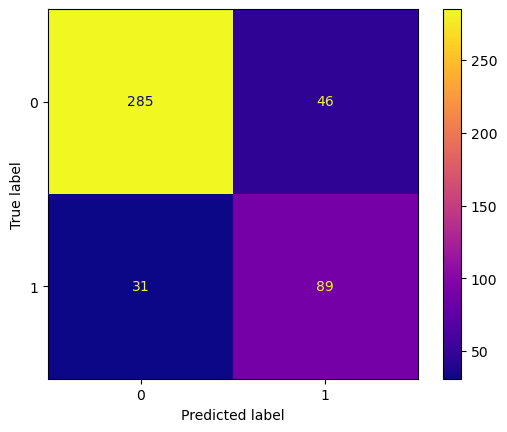

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test, cmap = "plasma")
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

In [9]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.93%


In [10]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

In [11]:
from sklearn.metrics import classification_report
import shap
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       331
           1       0.66      0.74      0.70       120

    accuracy                           0.83       451
   macro avg       0.78      0.80      0.79       451
weighted avg       0.84      0.83      0.83       451



https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 \
https://christophm.github.io/interpretable-ml-book/shap.html
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

In [12]:
import shap
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)

In [13]:
explainer_plot = shap.Explainer(stq_model_2, X_test)
shap_values_plot = explainer(X_test)

In [11]:
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend which supports saving without display
import matplotlib.pyplot as plt

#shap.plots.beeswarm(shap_values_plot, color=plt.get_cmap("plasma"))
# Create the SHAP summary plot
shap.summary_plot(shap_values_plot, X_test, max_display = 10, show=False, cmap = 'plasma')

# Access the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Change the background color of the plot
fig.patch.set_facecolor('black')  # Set the figure background color
ax.set_facecolor('black')  # Set the axes background color

# Change the color of the text to white
for text in ax.texts:
    text.set_color('white')

# Change the color of the ticks and labels to white
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')


# Change the color of the legend text to white, if there is a legend
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_color('white')

# Show the modified plot
#plt.show()
plt.savefig('beeswarm.png', dpi=300, bbox_inches='tight')

In [12]:
import matplotlib
matplotlib.use('Agg')  # Use the 'Agg' backend which supports saving without display
import matplotlib.pyplot as plt

#shap.plots.beeswarm(shap_values_plot, color=plt.get_cmap("plasma"))
# Create the SHAP summary plot
shap.summary_plot(shap_values_plot.abs, X_test, max_display=10, show=False, cmap='plasma')

# Access the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Change the background color of the plot
fig.patch.set_facecolor('black')  # Set the figure background color
ax.set_facecolor('black')  # Set the axes background color

# Change the color of the text to white
for text in ax.texts:
    text.set_color('white')

# Change the color of the ticks and labels to white
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Change the color of the legend text to white, if there is a legend
legend = ax.get_legend()
if legend:
    for text in legend.get_texts():
        text.set_color('white')

# Show the modified plot
#plt.show()
# Save the plot as an image after it has been displayed
plt.savefig('abs_beeswarm.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [57]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df_sorted = shap_df.sort_index()

X_test_sort = X_test.sort_index()
# Concatenate SHAP values DataFrame with the testing DataFrame
testing_df_with_shap = pd.concat([X_test_sort, shap_df_sorted, axis = 1])

print("Testing DataFrame with SHAP values:")
testing_df_with_shap

Testing DataFrame with SHAP values:


bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1    1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
8    1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
13   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
14   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
20   1.468198  1.493448  1.502102  1.490920   1.487852    1.530254  12.523438   
..        ...       ...       ...       ...        ...         ...        ...   
495  0.052800  0.008868 -0.254762 -0.137858  -0.022251   -0.019786  -0.121764   
496 -0.006497 -0.031855  0.061850  0.060667   0.009371    0.000284  -0.264233   
497 -0.066472 -0.037111  0.118673  0.053373  -0.047468    0.037348   0.098138   
498  0.027353 -0.003522 -0.307997 -0.160860  -0.025302   -0.024604  -0.096245   
499 -0.007724 -0.002386  0.066307  0.035253   0.028802   -0.002501   0.099249   

     clay_5_15  clay_15_30  clay_30_60  ...    kw_025    resdept  soil_depth  \
1    12.517578   14.886719   20.718323  ...  0.245076  56.675571  205.172592   
8    12.517578   14.886719   20.718323  ...  0.268404  76.961235  203.259857   
13   12.517578   14.886719   20.718323  ...  0.245600  56.852406  203.773285   
14   12.517578   14.886719   20.718323  ...  0.246688  57.499866  203.197495   
20   12.517578   14.886719   20.718323  ...  0.246208  56.510117  207.276459   
..         ...         ...         ...  ...       ...        ...         ...   
495  -0.045384   -0.090775    0.003352  ... -0.045344   0.087791   -0.060610   
496  -0.096133   -0.003368   -0.011160  ... -0.098275  -0.006268    0.221216   
497  -0.010317    0.001904   -0.016167  ... -0.002421  -0.018437   -0.250735   
498  -0.059026   -0.087672   -0.027363  ... -0.045627   0.088612   -0.054358   
499   0.017435    0.005140   -0.001655  ...  0.016650   0.021018    0.411846   

     wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
1                 85.919785  0.000263      26.720432  418.933075  384.077240   
8                 58.243359  0.000435      26.681686  420.944397  384.988312   
13                85.973389  0.000292      26.462543  418.941406  384.056030   
14                85.512657  0.000542      26.163368  422.054596  384.962921   
20                87.030045  0.000485      26.554554  422.136475  385.185944   
..                      ...       ...            ...         ...         ...   
495               -0.192449  0.057707      -0.010724   -0.596820   -0.156359   
496               -0.224265  0.000992       0.237116    0.263374   -0.065170   
497                0.043642  0.241138      -0.100760    0.439768   -0.228377   
498               -0.220626  0.018376       0.118229   -0.189874    0.040270   
499                0.180998 -0.005621       0.160111    0.498324    0.631199   

      dist_drain   dist_road  
1    4032.639783   38.345230  
8    2956.243415   80.214738  
13   4148.638061   63.900013  
14   5189.771412  114.294758  
20   5902.665125   73.324525  
..           ...         ...  
495    -0.091332    0.084344  
496    -0.249908   -0.082795  
497    -0.123812    0.177258  
498    -0.285749   -0.211449  
499     0.323895   -0.595175  

[1000 rows x 68 columns]

In [68]:
feature_names = X_test.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

col_name  feature_importance_vals
56            ec                 0.364119
64         bio12                 0.336103
60    soil_depth                 0.258858
65         bio07                 0.228194
66    dist_drain                 0.213388
..           ...                      ...
40   silt_60_100                 0.000000
41  silt_100_200                 0.000000
42   theta_r_0_5                 0.000000
43  theta_r_5_15                 0.000000
34   sand_60_100                 0.000000

[68 rows x 2 columns]

In [55]:
x_test_index = X_test.index.tolist()
coords = data_with_coords.loc[x_test_index]
coords = coords[['x_lon', 'y_lat']].copy()
testing_df_shap_and_coords = pd.concat([testing_df_with_shap, coords], axis=1)
testing_df_shap_and_coords

bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200   clay_0_5  \
1    1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
8    1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
13   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
14   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
20   1.468198  1.493448  1.502102   1.49092   1.487852    1.530254  12.523438   
..        ...       ...       ...       ...        ...         ...        ...   
495       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
496       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
497       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
498       NaN       NaN       NaN       NaN        NaN         NaN        NaN   
499       NaN       NaN       NaN       NaN        NaN         NaN        NaN   

     clay_5_15  clay_15_30  clay_30_60  ...  soil_depth  \
1    12.517578   14.886719   20.718323  ...   -0.225564   
8    12.517578   14.886719   20.718323  ...   -0.314183   
13   12.517578   14.886719   20.718323  ...   -0.242654   
14   12.517578   14.886719   20.718323  ...   -0.096531   
20   12.517578   14.886719   20.718323  ...   -0.417779   
..         ...         ...         ...  ...         ...   
495        NaN         NaN         NaN  ...   -0.060610   
496        NaN         NaN         NaN  ...    0.221216   
497        NaN         NaN         NaN  ...   -0.250735   
498        NaN         NaN         NaN  ...   -0.054358   
499        NaN         NaN         NaN  ...    0.411846   

     wind_erodibility_index    rf_025  water_storage     bio12     bio07  \
1                 -0.200445  0.185718      -0.203341 -0.171464 -0.238725   
8                 -0.158150  0.169542      -0.201416 -0.412158 -0.128007   
13                -0.309241 -0.083485       0.006850 -0.505040 -0.052800   
14                -0.003306 -0.034843       0.011592  0.216806 -0.200886   
20                -0.302947 -0.005014      -0.184486 -0.384405 -0.254578   
..                      ...       ...            ...       ...       ...   
495               -0.192449  0.057707      -0.010724 -0.596820 -0.156359   
496               -0.224265  0.000992       0.237116  0.263374 -0.065170   
497                0.043642  0.241138      -0.100760  0.439768 -0.228377   
498               -0.220626  0.018376       0.118229 -0.189874  0.040270   
499                0.180998 -0.005621       0.160111  0.498324  0.631199   

     dist_drain  dist_road        x_lon        y_lat  
1     -0.220250  -0.027103  681524.7835  3802226.074  
8      0.033681  -0.308357  685280.4210  3802517.758  
13    -0.378369  -0.191058  681482.0643  3802383.845  
14     0.113081  -0.102973  686828.7964  3805987.986  
20    -0.272034  -0.001755  687704.3474  3806799.329  
..          ...        ...          ...          ...  
495   -0.091332   0.084344          NaN          NaN  
496   -0.249908  -0.082795          NaN          NaN  
497   -0.123812   0.177258          NaN          NaN  
498   -0.285749  -0.211449          NaN          NaN  
499    0.323895  -0.595175          NaN          NaN  

[910 rows x 138 columns]

### If want to export shap values then need to figure this out

In [58]:
# Define the file path where you want to save the CSV file
csv_file_path = "D:/!!Research/rgee_test/GEE_LPC/point_data/testing_results/testing_data_with_shap.csv"

# Export the DataFrame to a CSV file
testing_df_with_shap.to_csv(csv_file_path, index=False)

print("CSV file has been successfully saved.")

CSV file has been successfully saved.


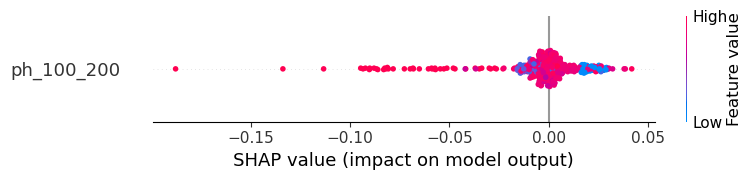

In [27]:
shap.summary_plot(shap_values[:,35:36], X_test.iloc[:, 35:36])

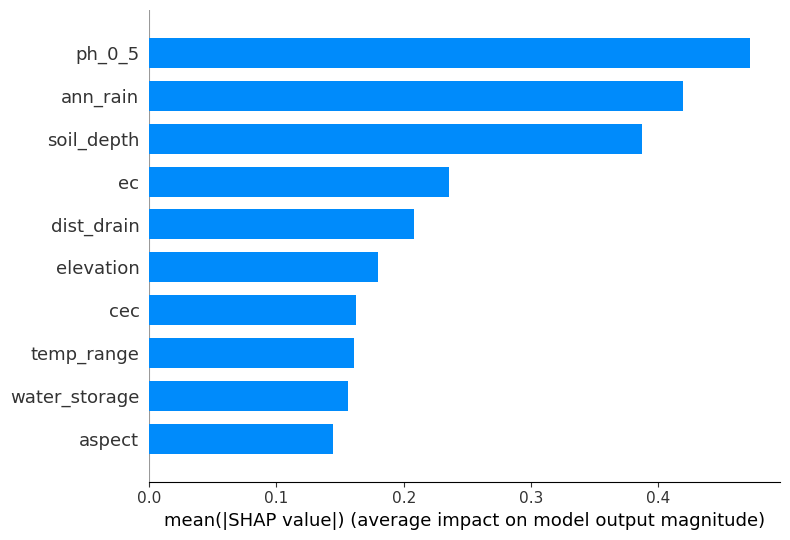

In [52]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10, show = False)
plt.savefig('mean_shap.png', dpi=300, bbox_inches='tight')

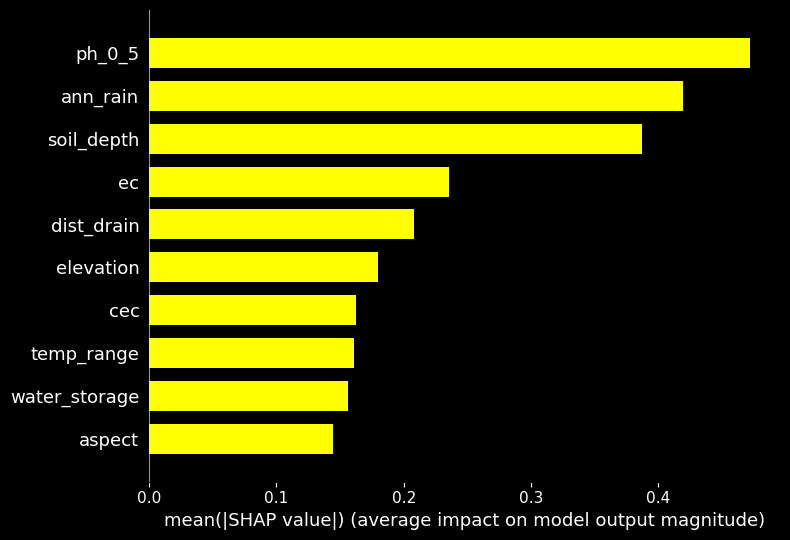

In [9]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10, show = False, color = 'yellow')

# Access the current figure and axes
fig_bar = plt.gcf()
ax_bar = plt.gca()

# Change the background color of the plot
fig_bar.patch.set_facecolor('black')  # Set the figure background color
ax_bar.set_facecolor('black')  # Set the axes background color

# Change the color of the text to white
for text in ax_bar.texts:
    text.set_color('white')

# Change the color of the ticks and labels to white
ax_bar.tick_params(colors='white')
ax_bar.yaxis.label.set_color('white')
ax_bar.xaxis.label.set_color('white')


# Show the modified plot
#plt.show()

plt.savefig('mean_shap.png', dpi=300, bbox_inches='tight')

In [22]:
shap.initjs()

In [23]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [24]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

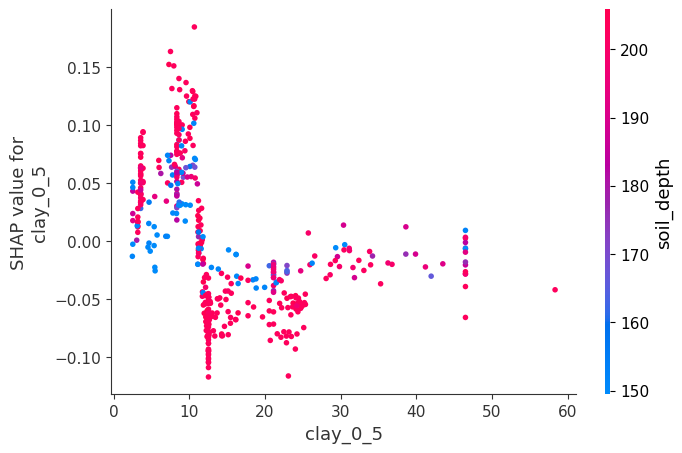

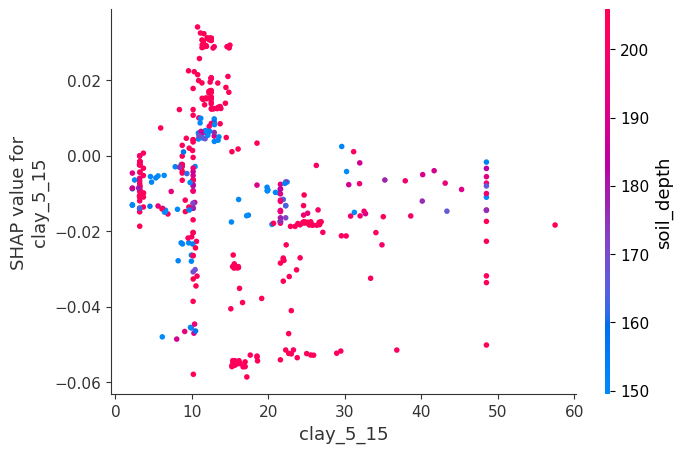

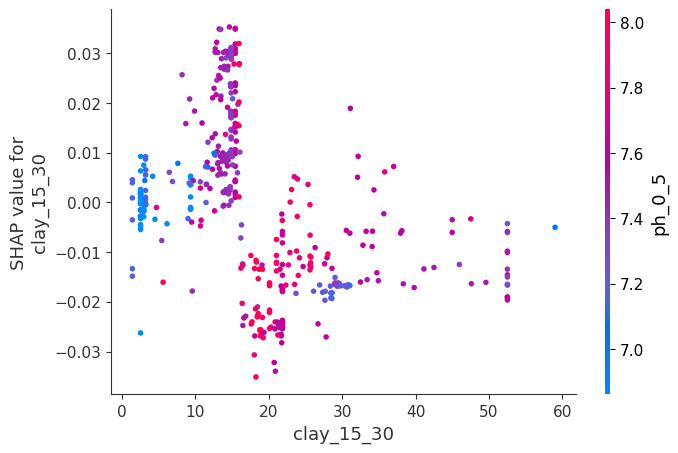

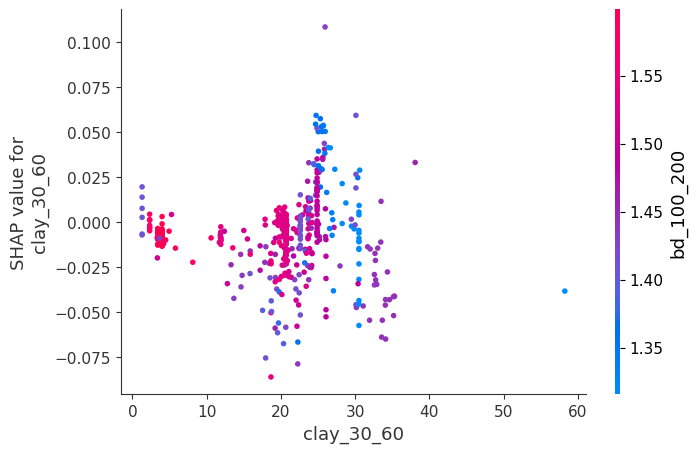

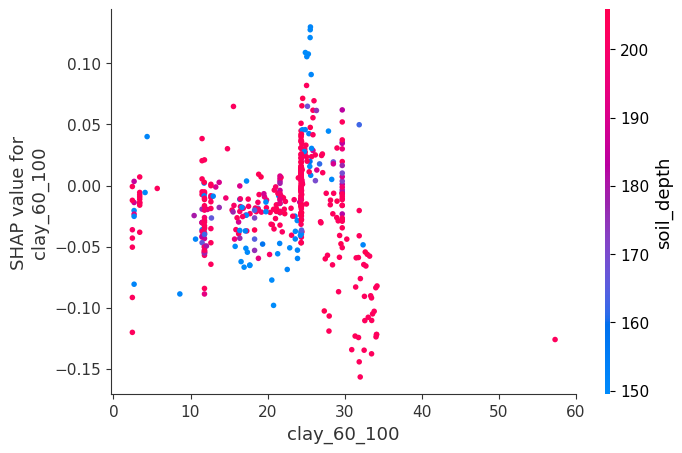

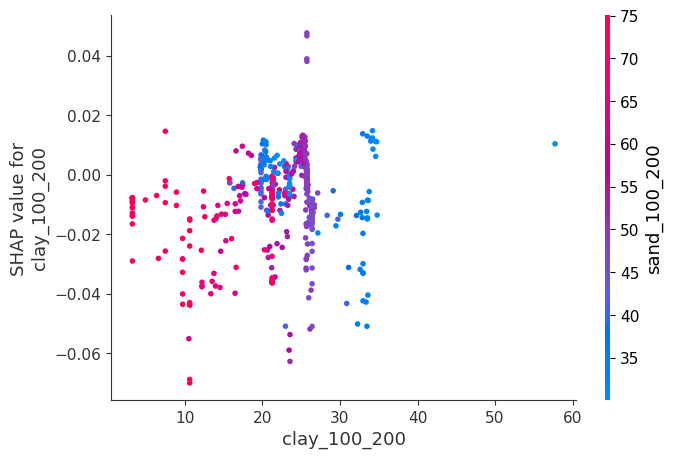

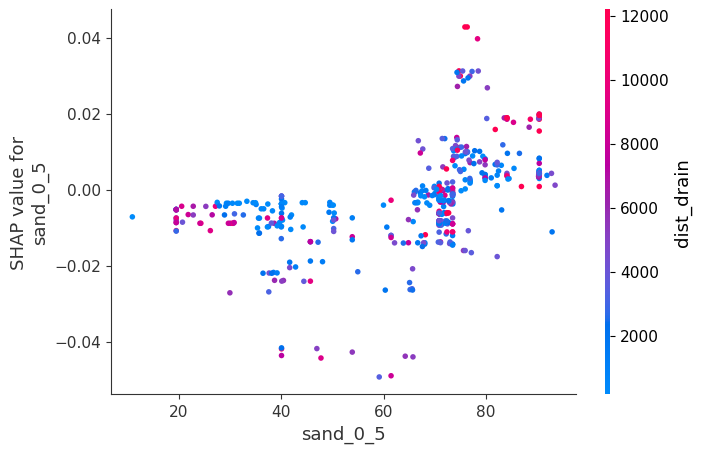

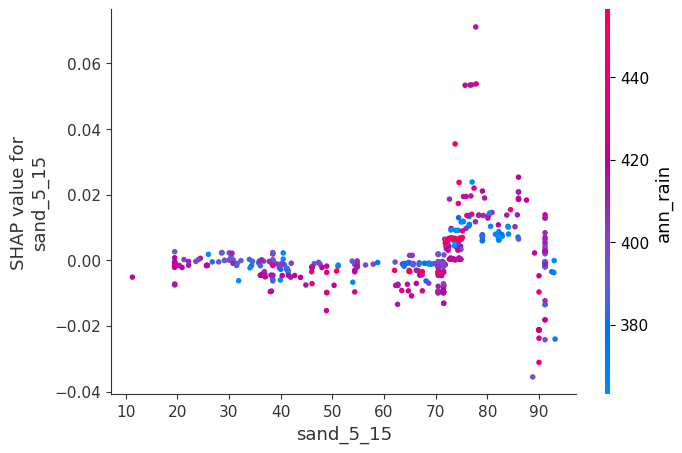

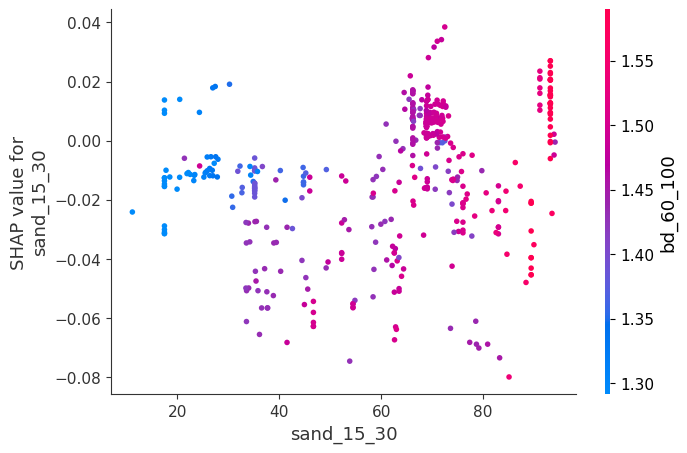

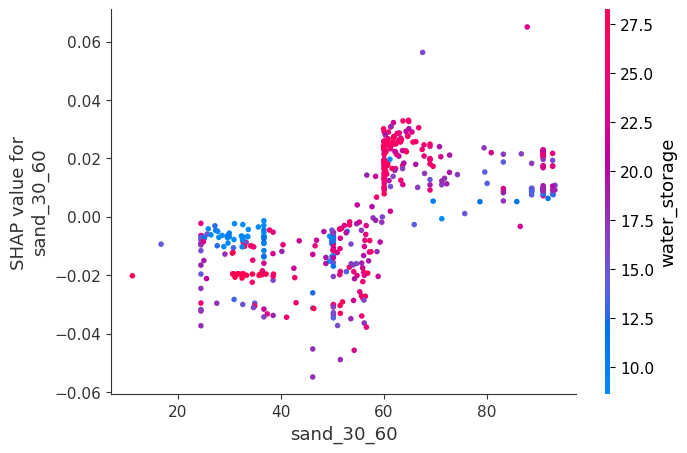

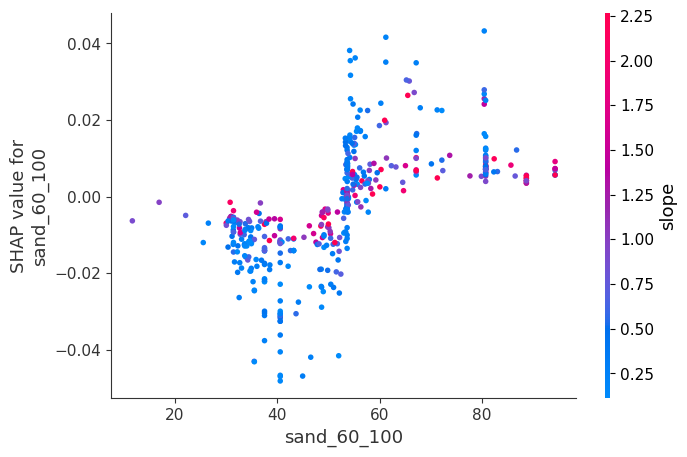

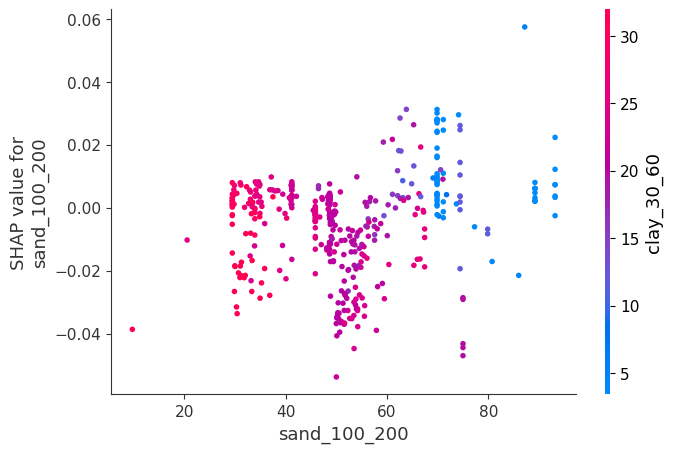

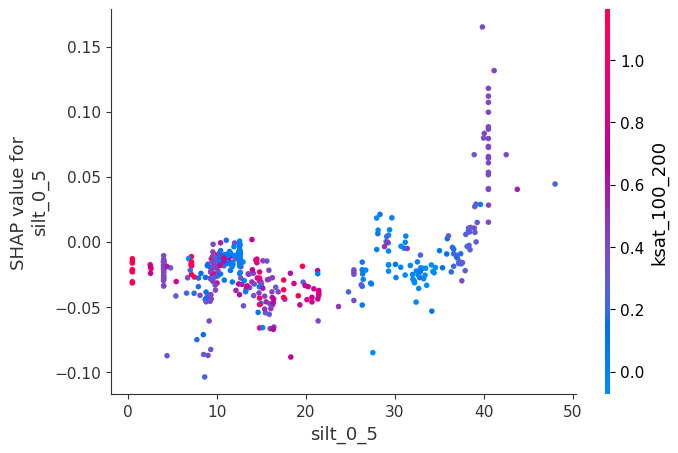

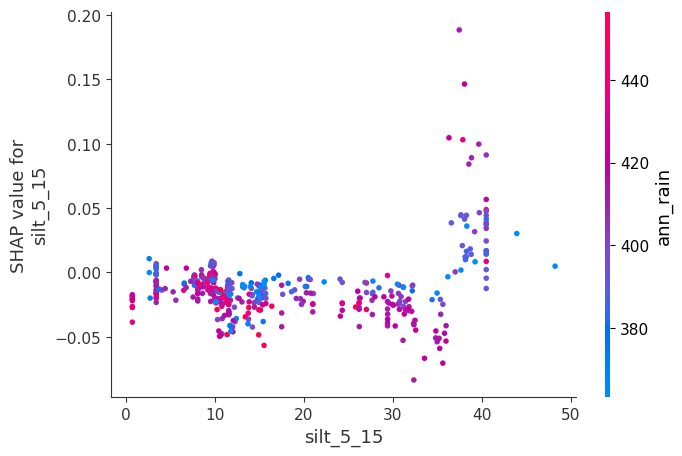

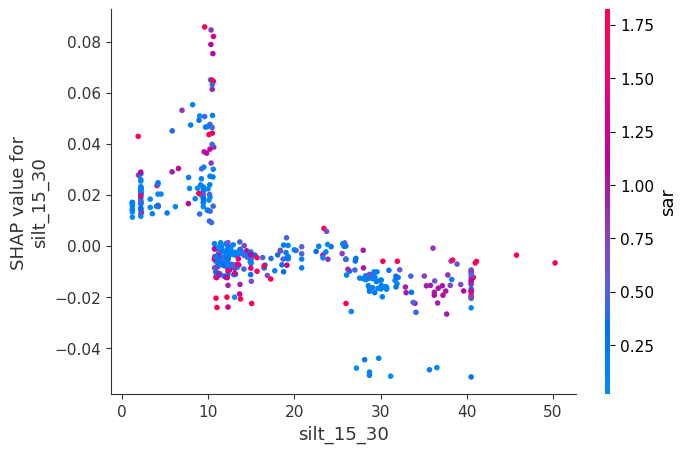

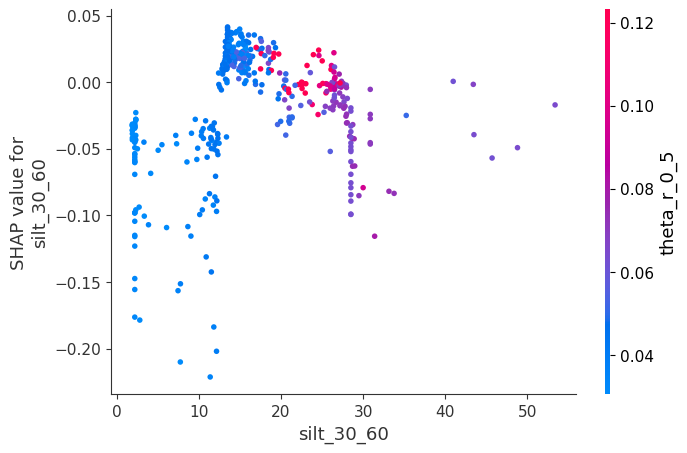

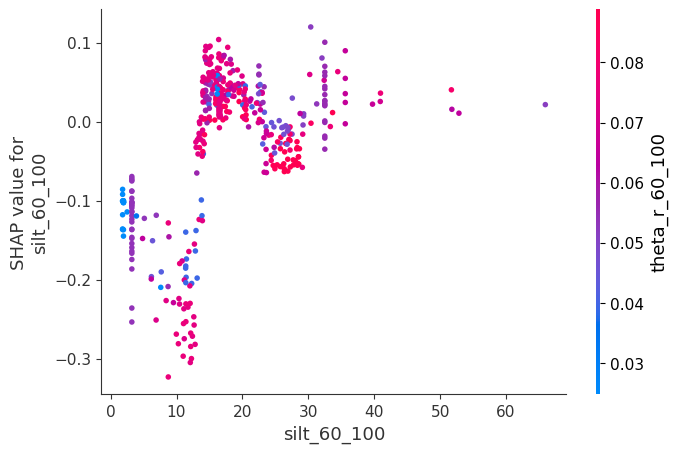

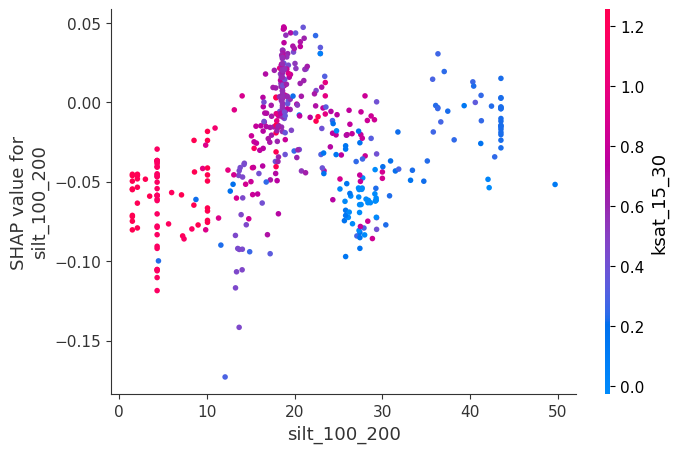

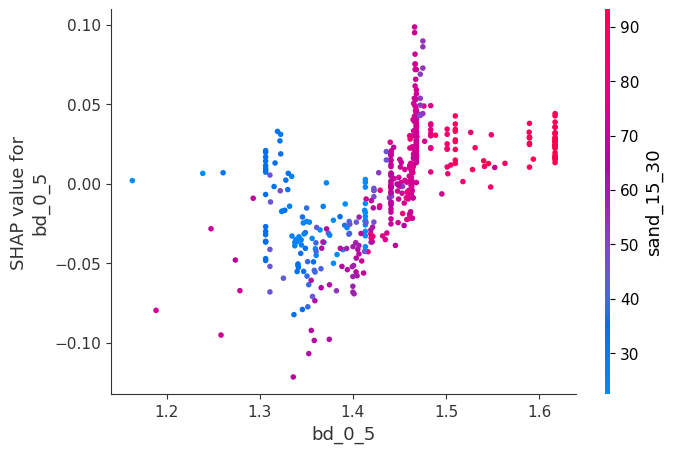

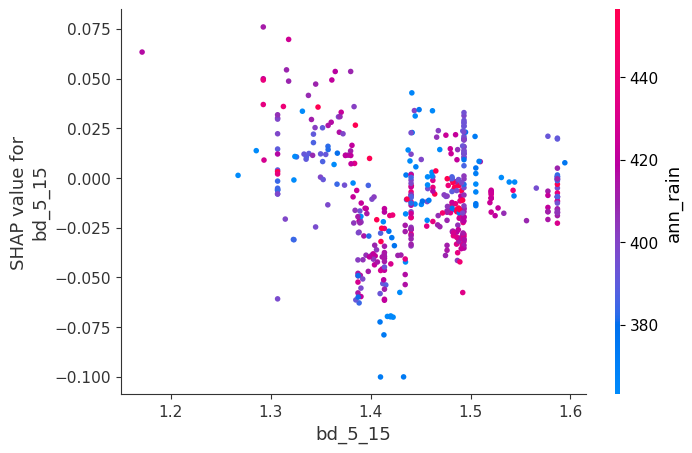

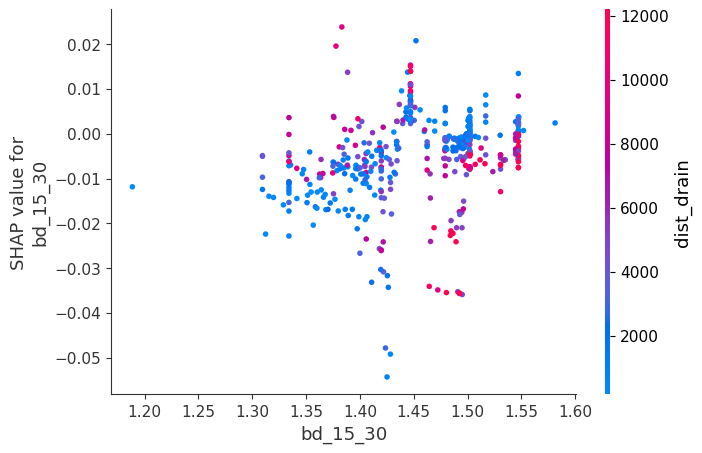

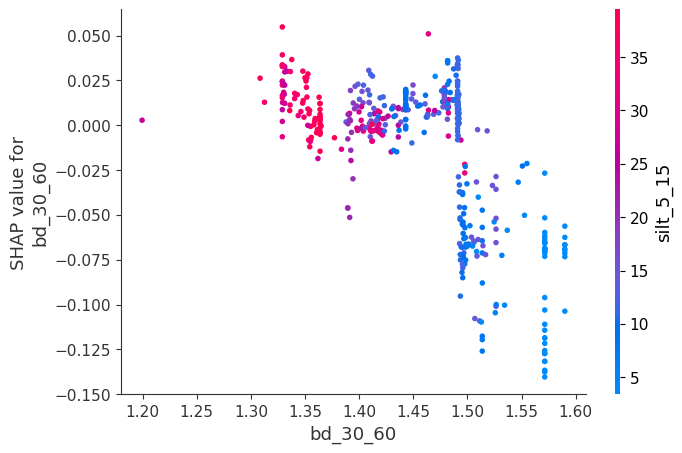

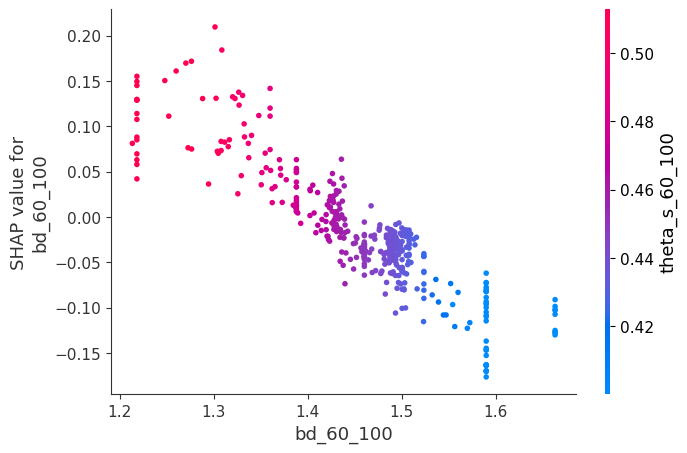

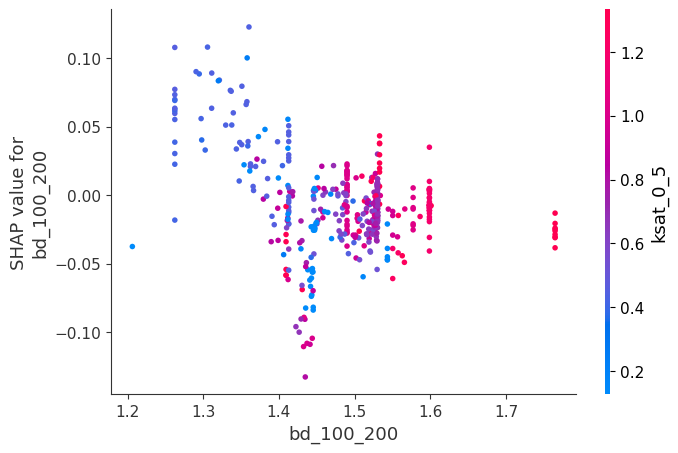

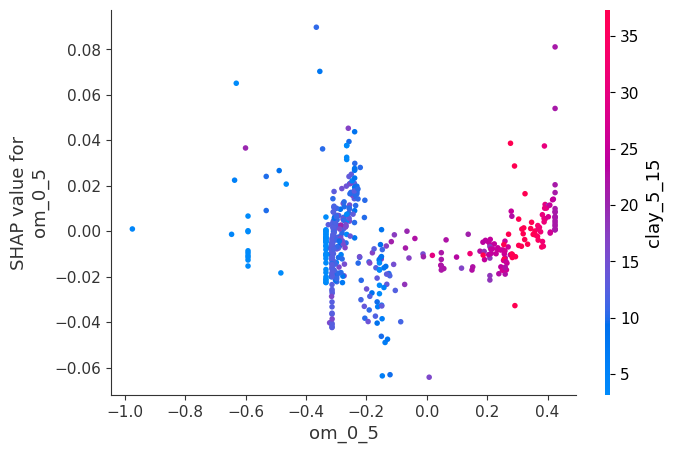

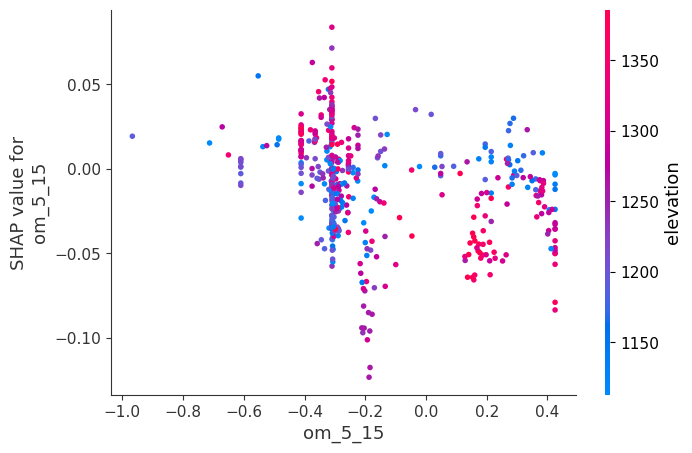

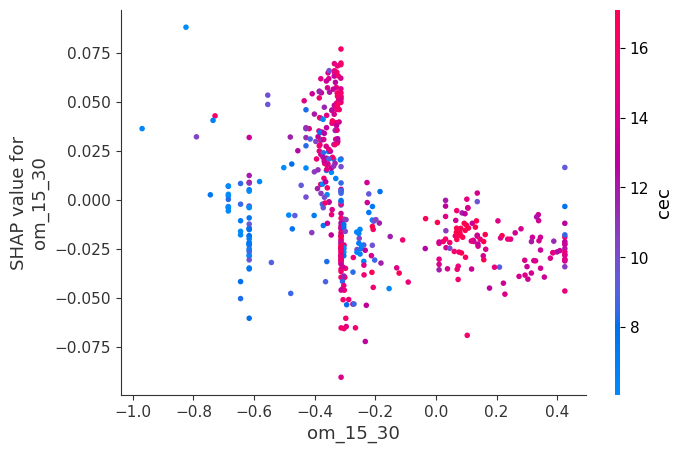

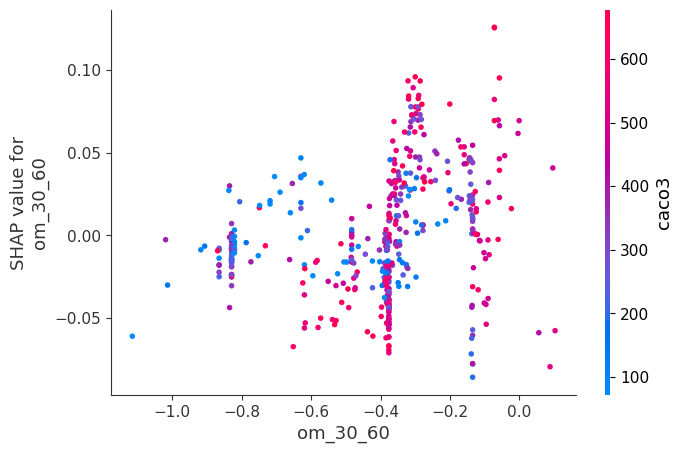

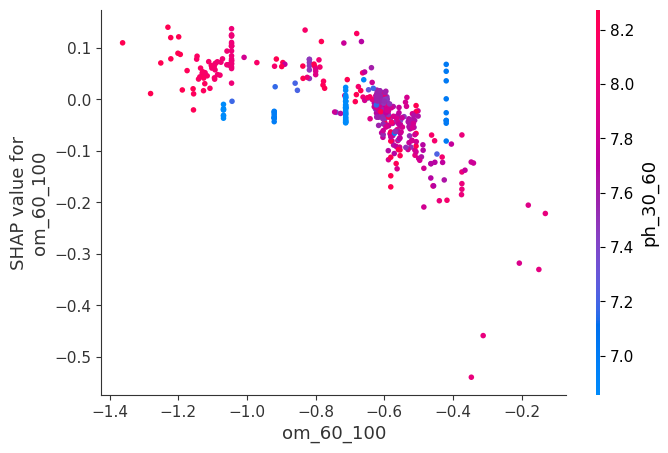

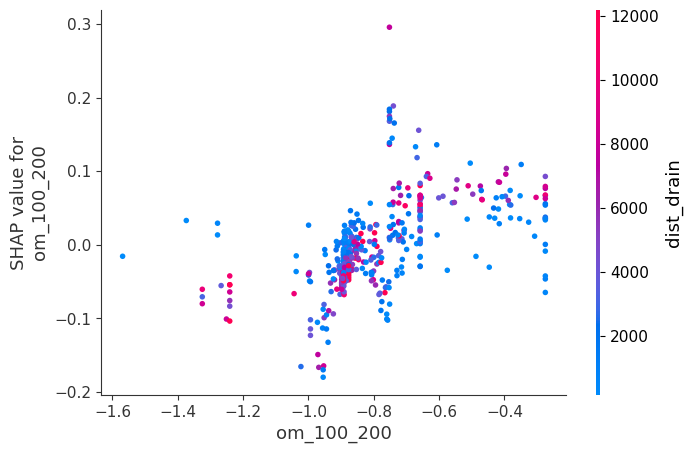

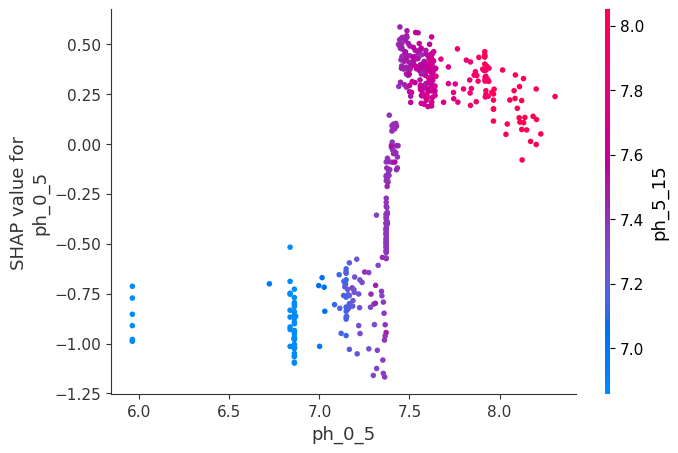

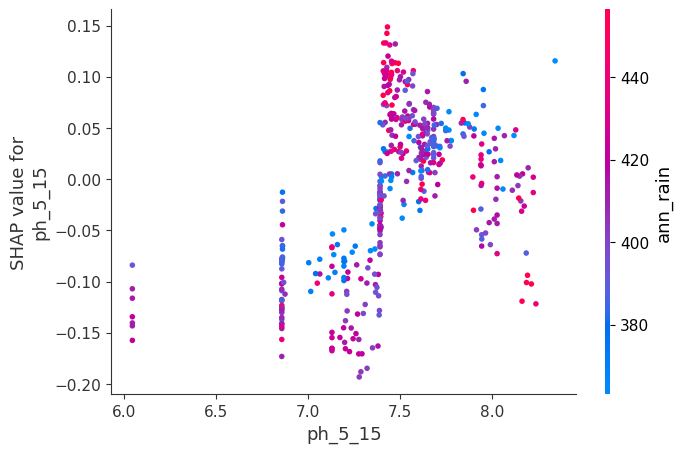

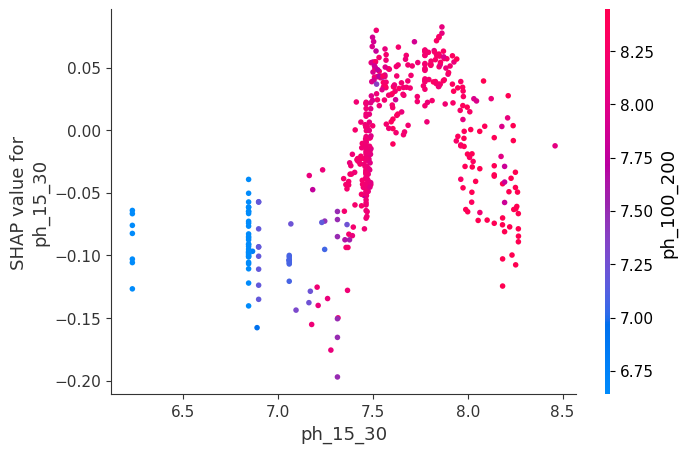

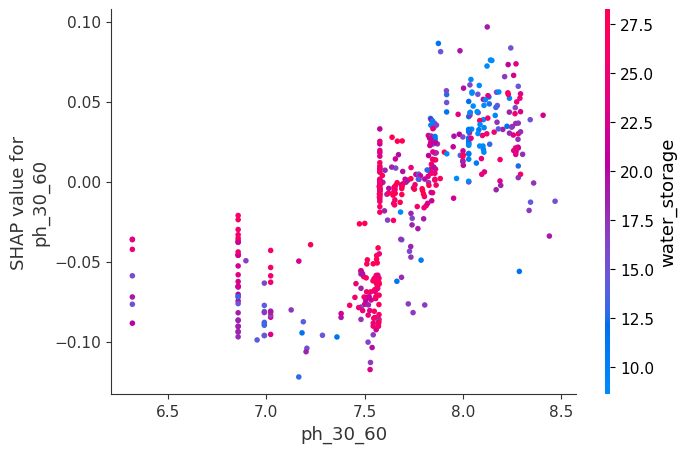

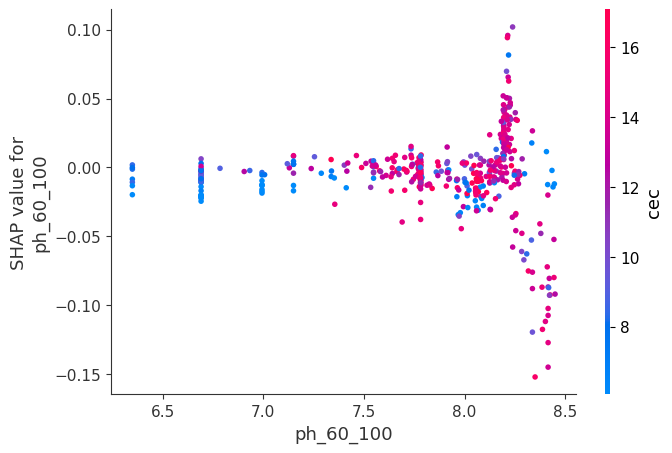

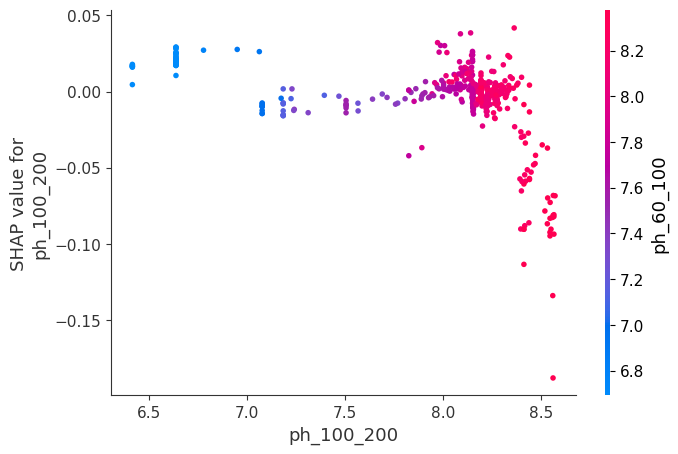

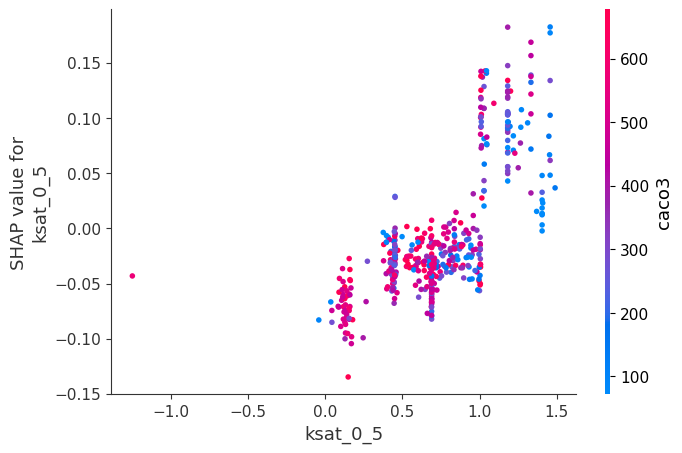

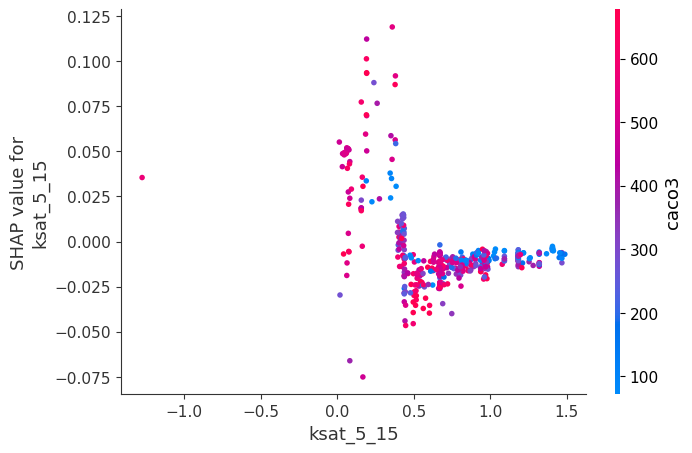

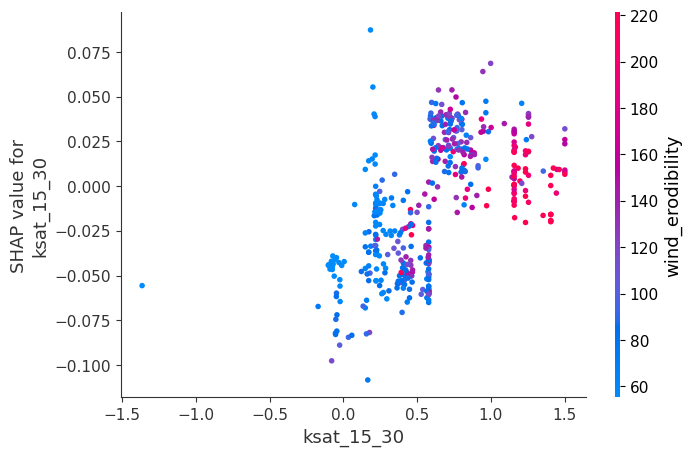

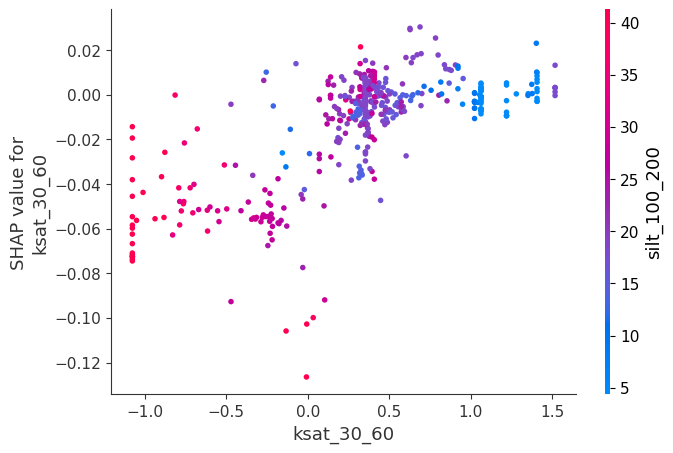

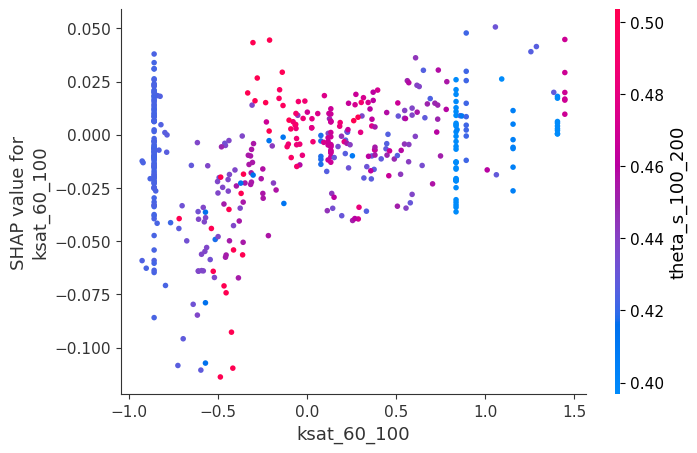

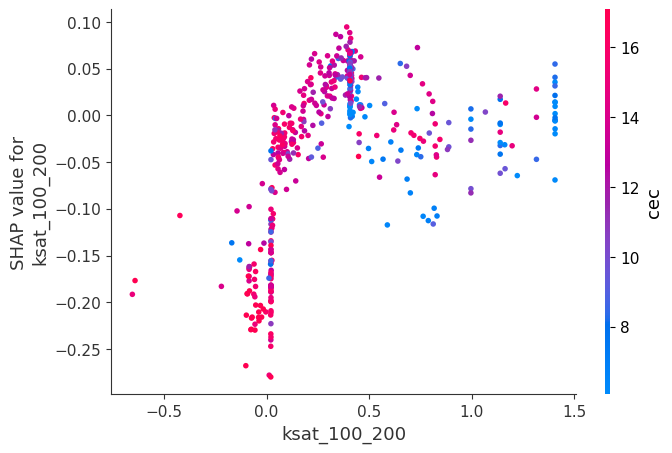

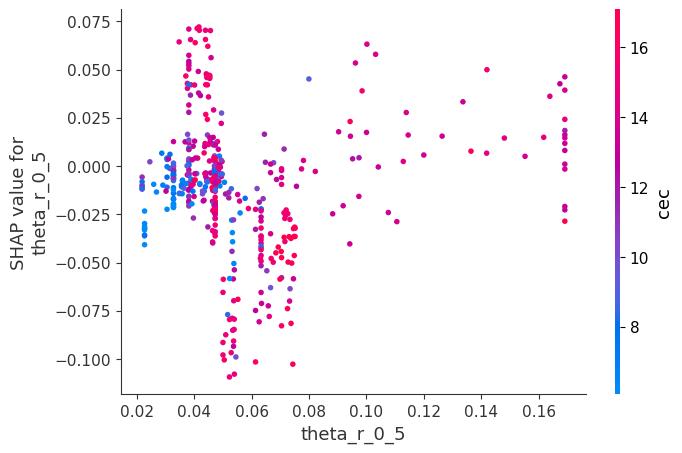

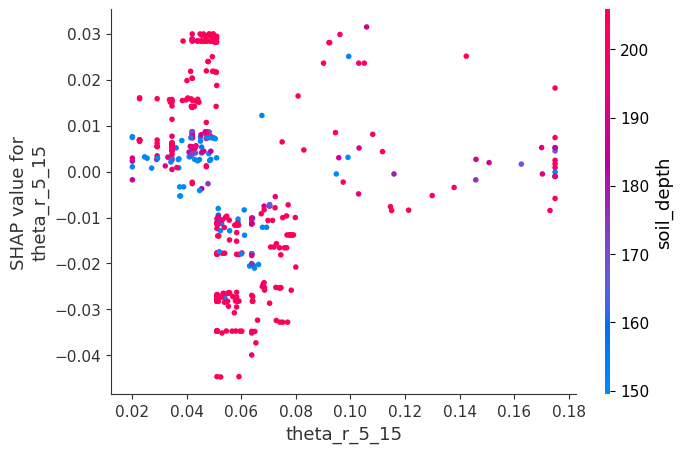

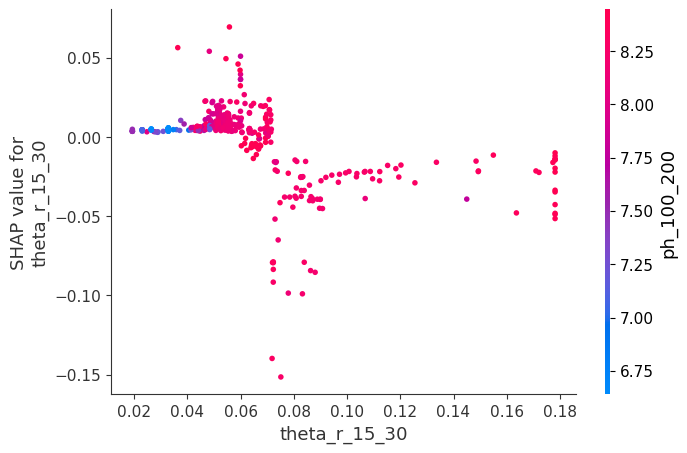

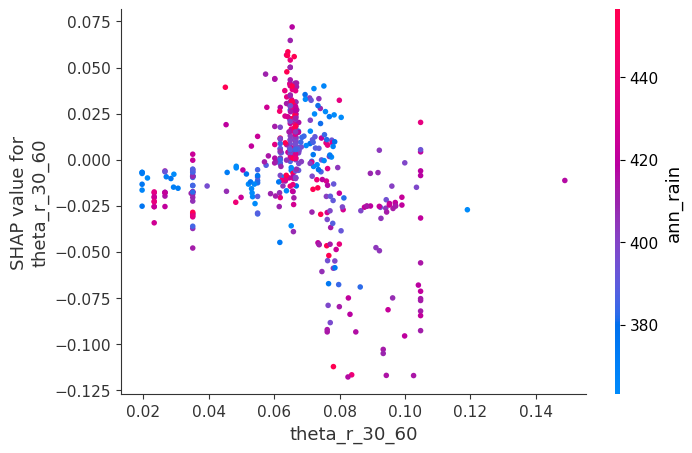

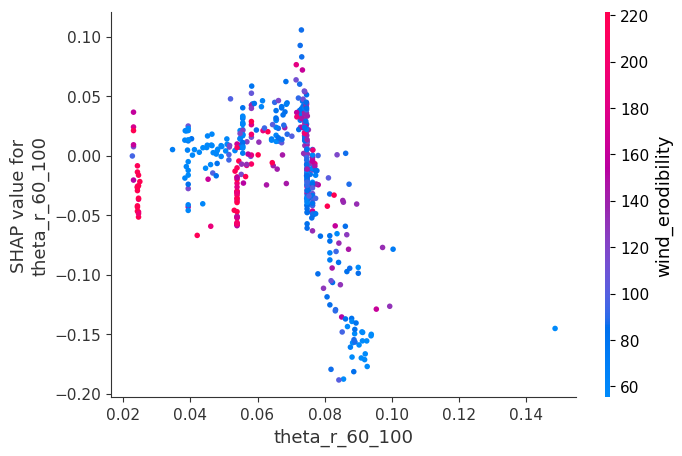

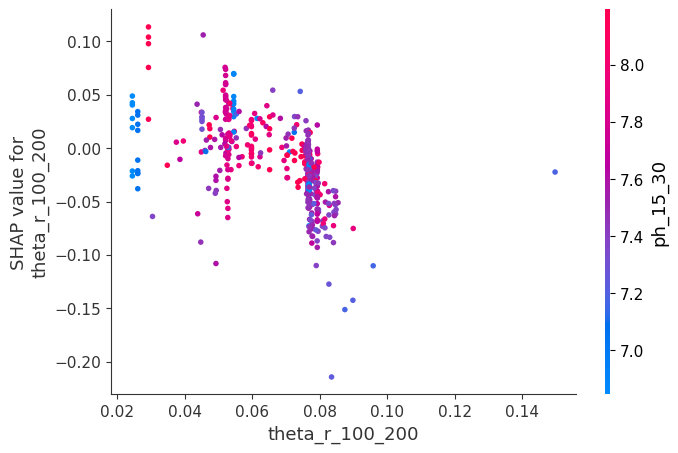

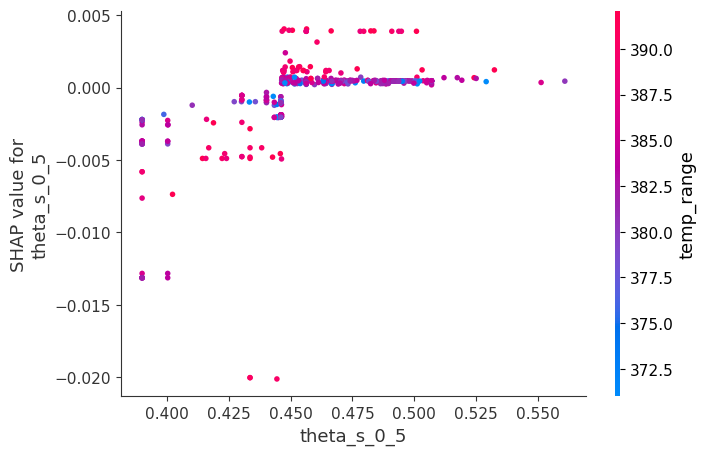

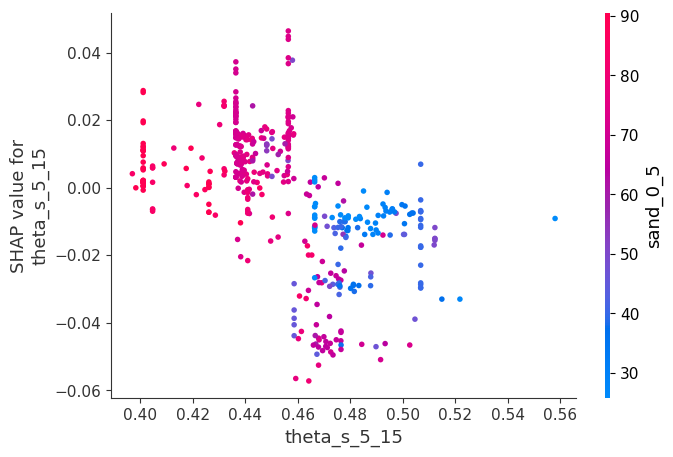

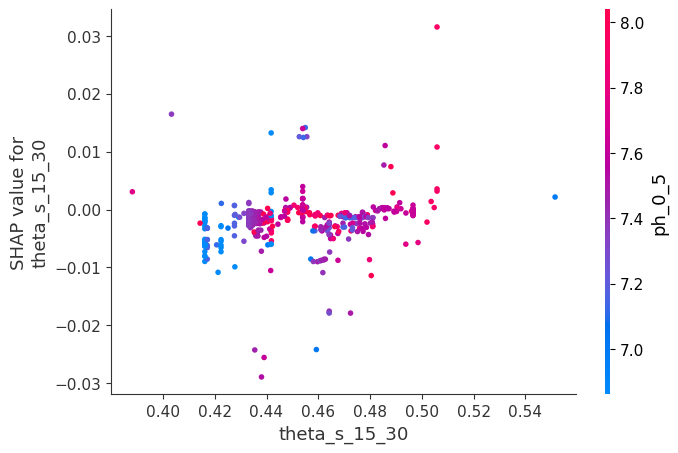

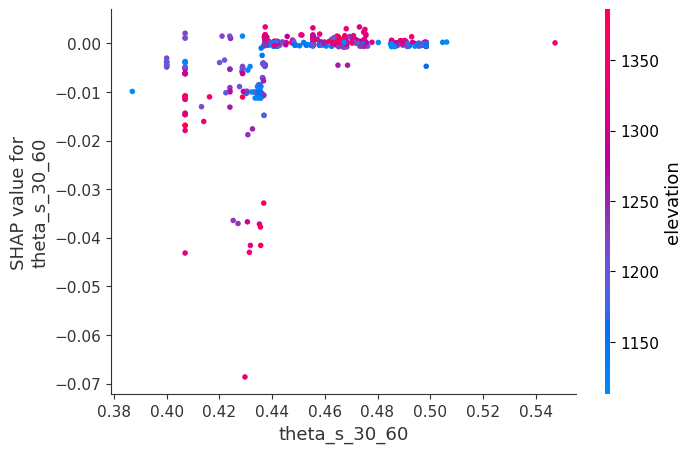

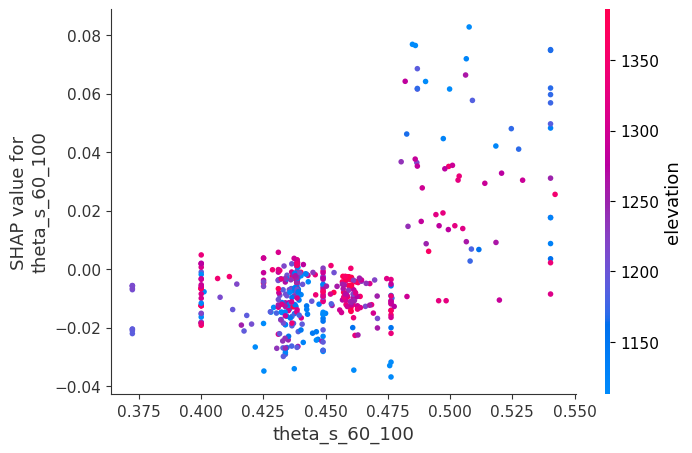

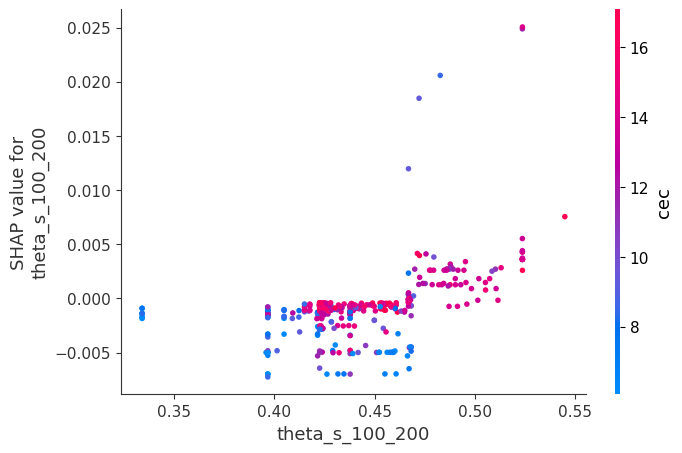

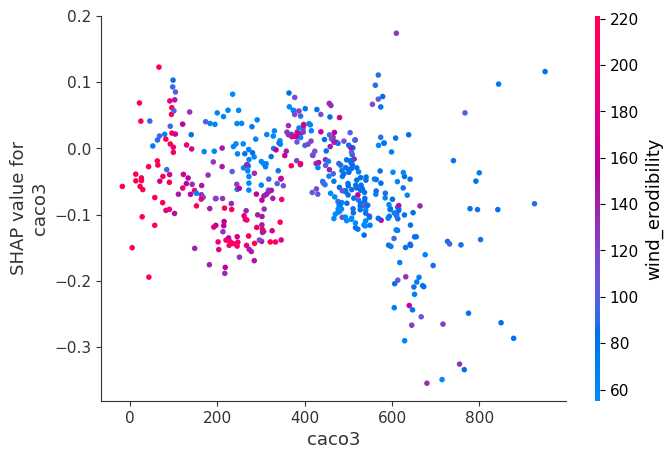

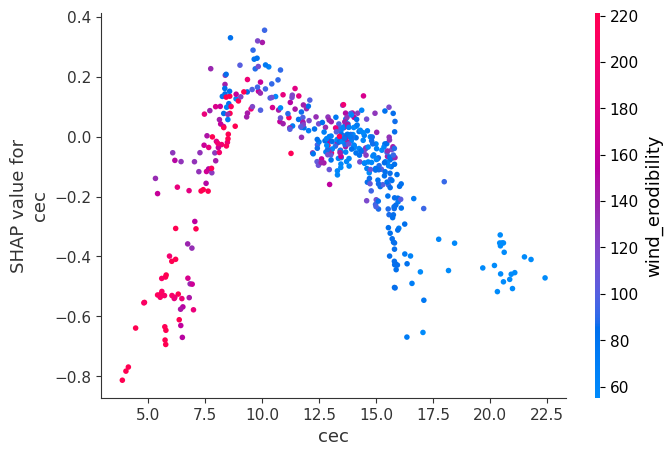

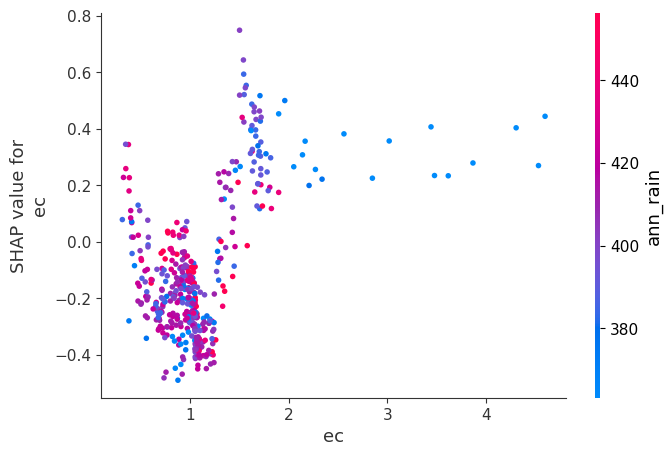

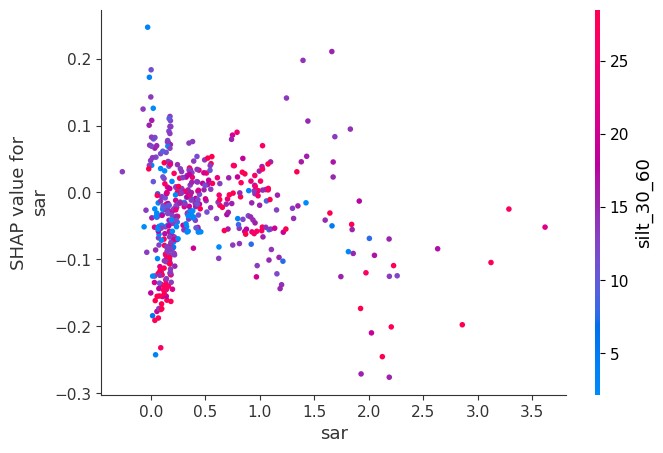

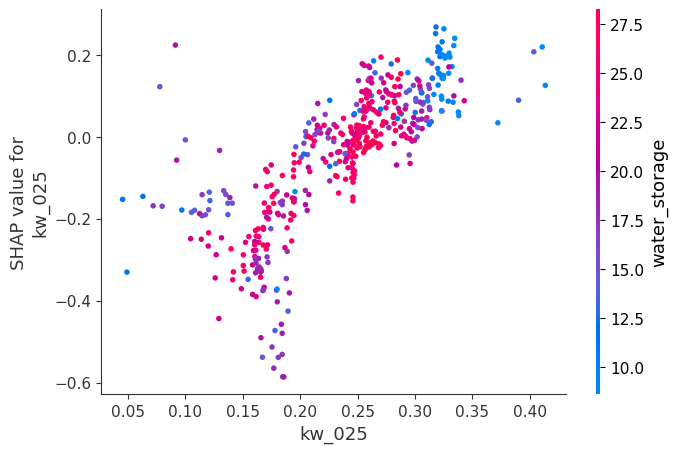

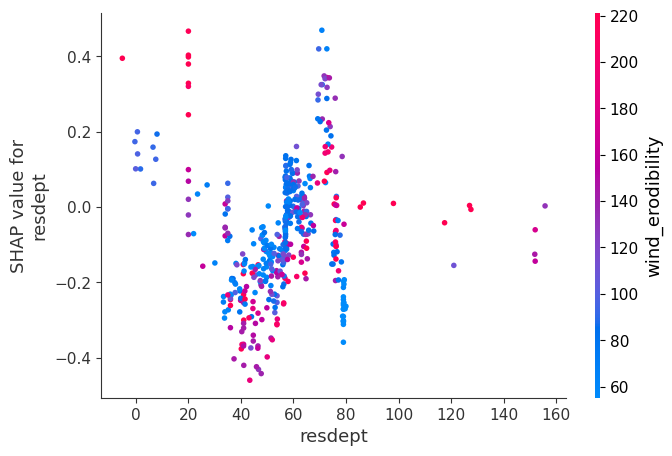

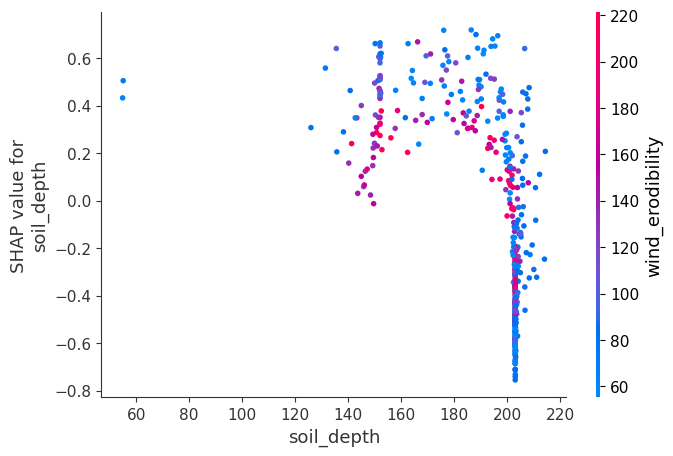

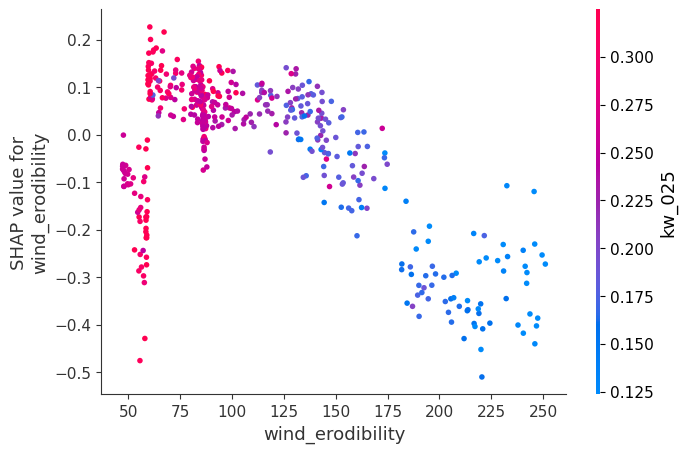

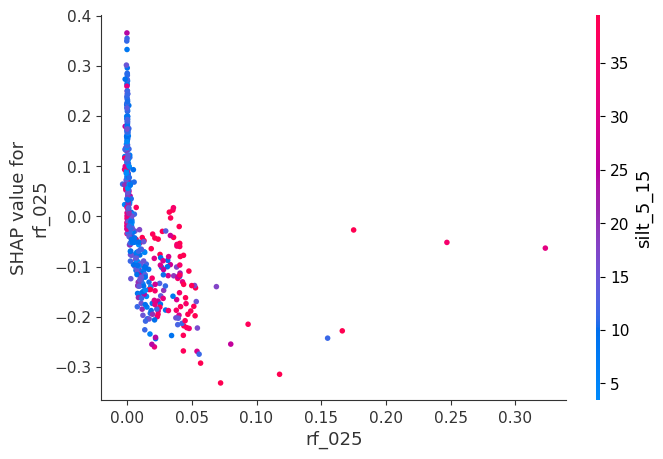

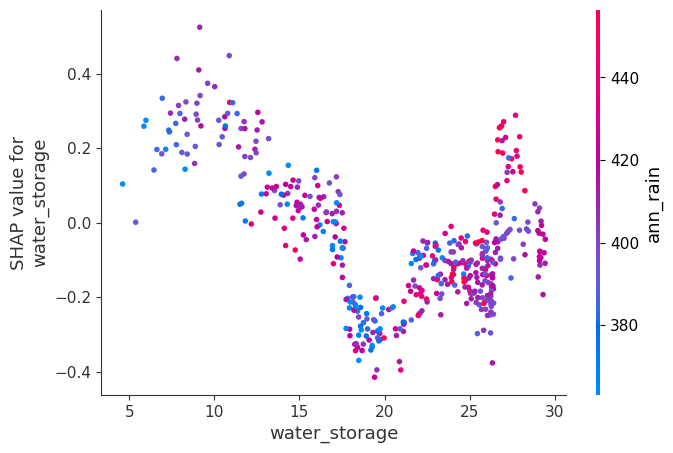

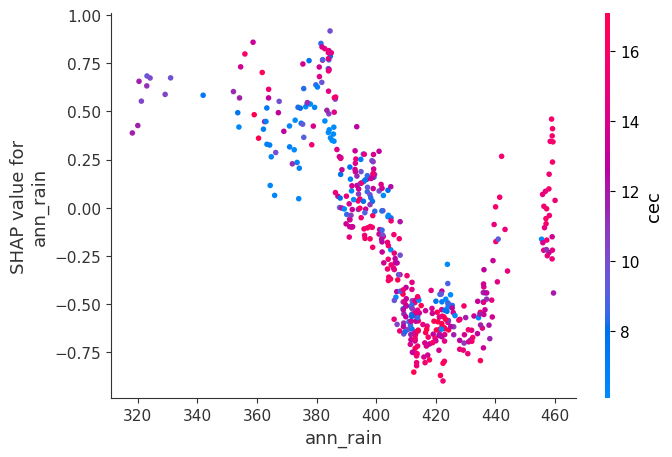

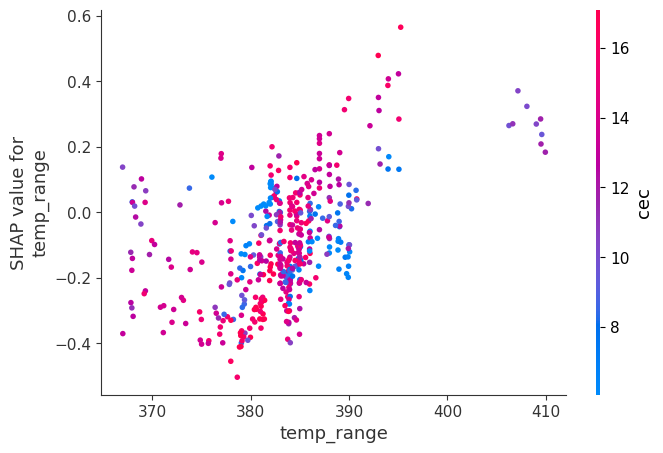

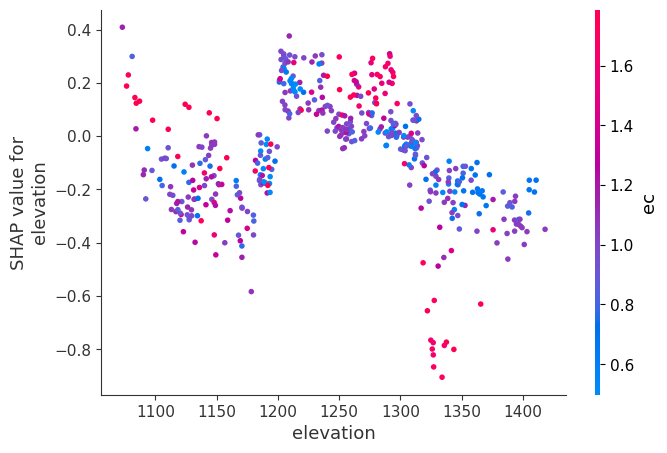

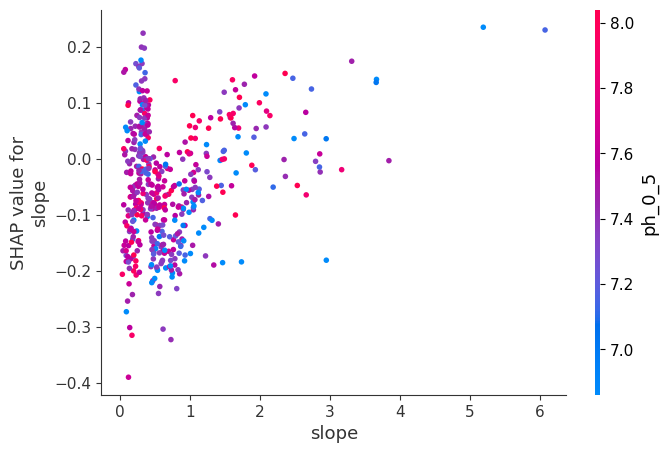

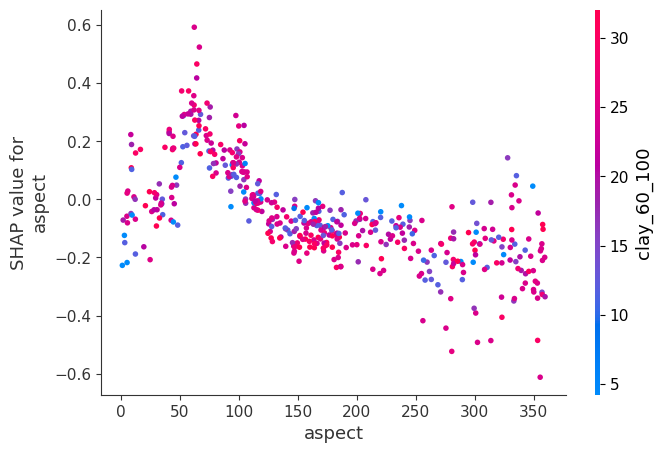

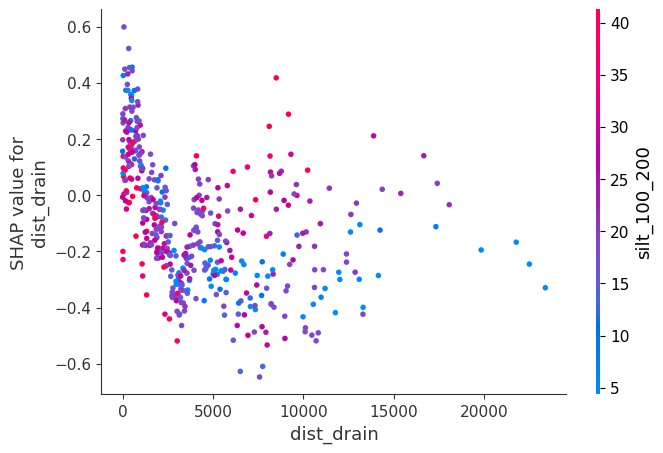

In [18]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_test, display_features=X_test)

In [24]:
explainer.expected_value

0.400031

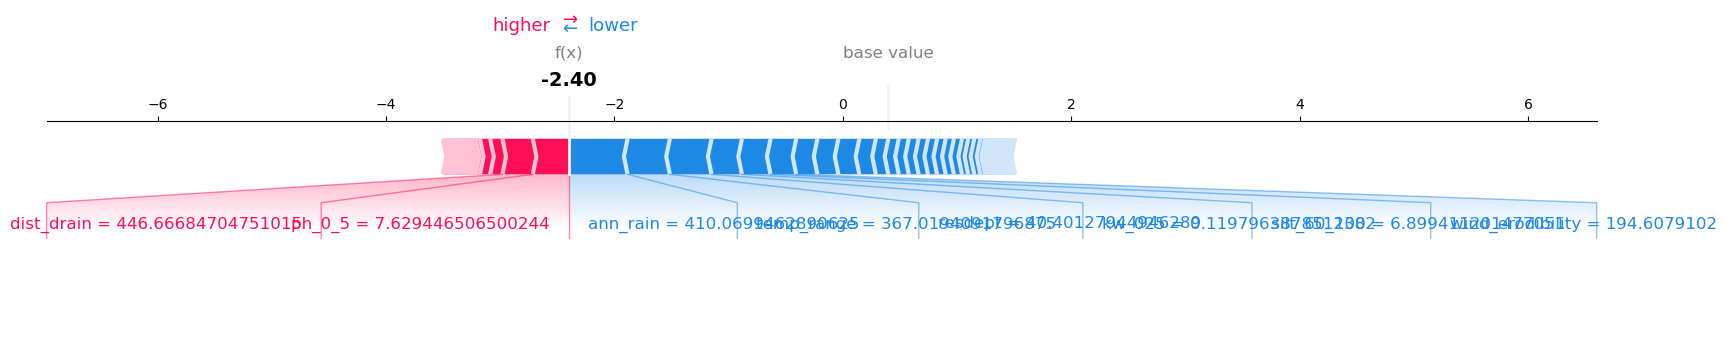

In [33]:
shap.plots.force(explainer.expected_value, shap_values[11,:], X_test.iloc[11, :], matplotlib = True) # can change to represent a row in the testing data

In [57]:
explainer2 = shap.Explainer(stq_model_2, X_test)
shap_values2 = explainer2(X_test)
shap.plots.waterfall(shap_values2[210], max_display = 10, show = False)
#plt.savefig('waterfall_plot.png', dpi=300, bbox_inches='tight')

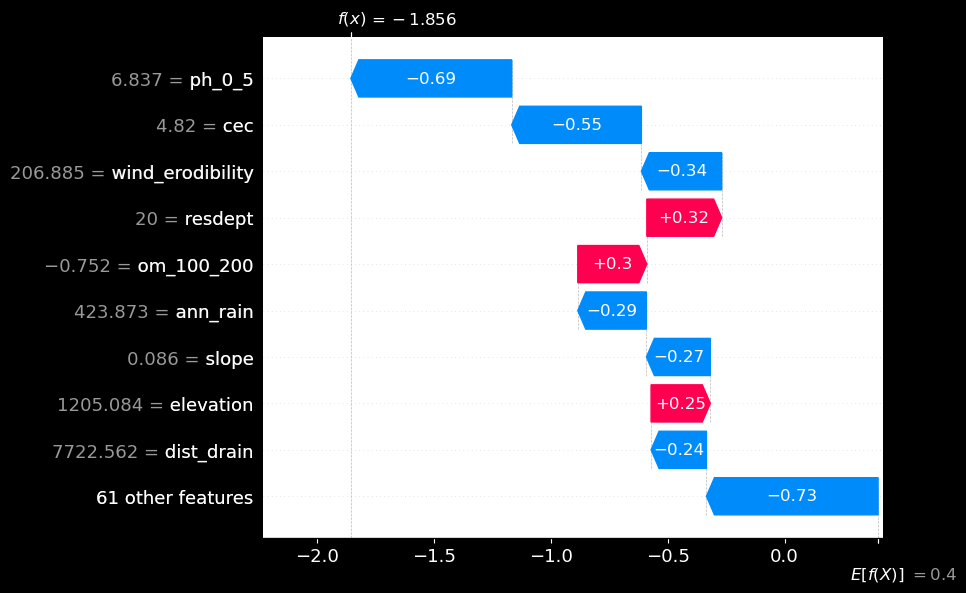

In [53]:
import matplotlib.cm as cm
# Create the SHAP waterfall plot without showing it
shap.waterfall_plot(shap_values_plot[210], show=False)

# Access the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Get the plasma colormap
plt.colormaps.get_cmap('plasma')

# Normalize the SHAP values to range [0, 1] for colormap mapping
norm = plt.Normalize(shap_values_plot[0].values.min(), shap_values_plot[1].values.max())

# Change the colors of the bars to match the plasma colormap
for bar in ax.patches:
    # Get the value of the bar
    value = bar.get_width() if bar.get_orientation() == 'horizontal' else bar.get_height()
    
    # Map the value to the colormap
    color = cmap(norm(value))
    
    # Set the color of the bar
    bar.set_facecolor(color)

# Change the background color of the plot
fig.patch.set_facecolor('black')  # Set the figure background color
ax.set_facecolor('black')  # Set the axes background color

# Change the color of the text to white
for text in ax.texts:
    text.set_color('white')

# Change the color of the ticks and labels to white
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')


# Show the modified plot
plt.show()

In [14]:
shap.plots.scatter(shap_values[:, "ph_0_5"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
shap.decision_plot(explainer, explainer.shap_values_plot(), X_test, link = 'logit', ignore_warnings=True, show = False)
# Access the current figure and axes
fig = plt.gcf()
ax = plt.gca()

# Change the background color of the plot
fig.patch.set_facecolor('black')  # Set the figure background color
ax.set_facecolor('black')  # Set the axes background color

# Change the color of the text to white
for text in ax.texts:
    text.set_color('white')

# Change the color of the ticks and labels to white
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')


# Show the modified plot
plt.show()
#plt.savefig('decision_plot.png', dpi=300, bbox_inches='tight')

AttributeError: 'TreeExplainer' object has no attribute 'shap_values_plot'

# Testing a Random Forests model

In [44]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

In [39]:
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       362
           1       0.52      0.70      0.59        89

    accuracy                           0.81       451
   macro avg       0.72      0.77      0.74       451
weighted avg       0.84      0.81      0.82       451



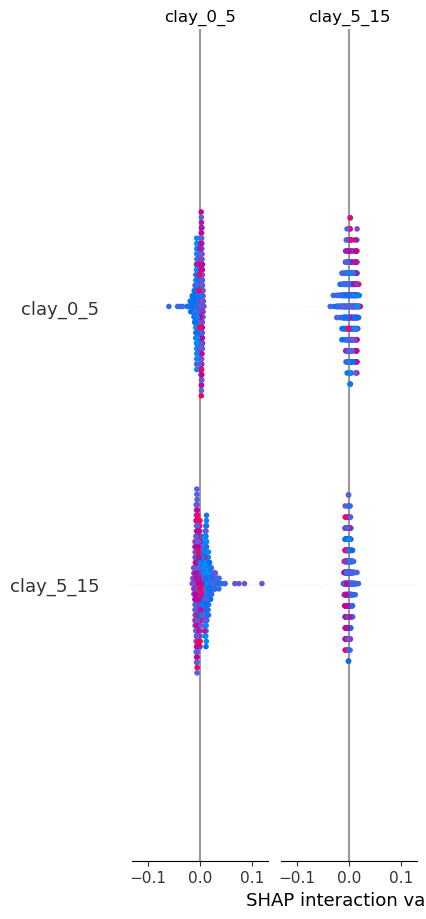

In [54]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

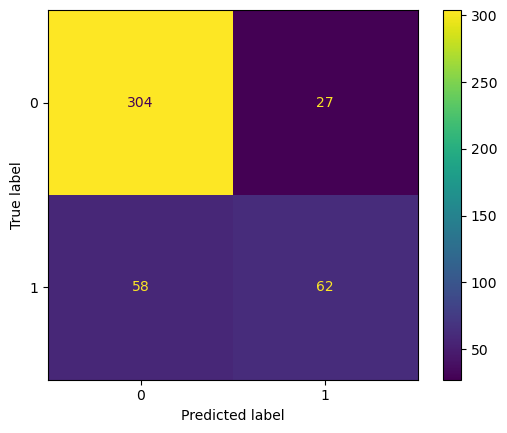

In [38]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)